# Week 8 Wednesday

## Announcements

* HW8 is posted.
* HW7 is due today.


## Plan 
* Random forests

## Simulated data for classification

Most of the code in this section is preliminary.  We first make an artificial dataset that we will use for classification, and then we write a helper function that will help us see the decision boundary of a classifier. 

In [ ]:
import pandas as pd
import numpy as np
import altair as alt
from itertools import product

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

Here we use a new scikit-learn function `make_blobs` to simulate some random data.  Don't worry about this function, the important thing is we now have some data on which we can perform classification.  We also divide it into a training set and a test set.

In [ ]:
X,y = make_blobs(
            n_samples=5000, 
            n_features=2, 
            centers=[[0,0],[2,2]],  # The center of each cluster
            random_state=13, 
            cluster_std=0.8 #standard deviation of the clusters
        )

cols = ["x","y"]
df = pd.DataFrame(X, columns=cols)
df["Class"] = y

X_train, X_test, y_train, y_test = train_test_split(
                                        df[cols],
                                        df["Class"], 
                                        train_size=0.9,
                                        random_state=0
                                    )

Here is the data we generated using `make_blobs`.  Our goal is to classify points being in Class 0 or Class 1. 

In [ ]:
alt.Chart(df).mark_circle().encode(
    x="x",
    y="y",
    color="Class:N")

alt.Chart(...)

Here is a helper function that can plot predictions for us.  This is similar to our code from a few days ago for drawing decision boundaries.  We first make a DataFrame that will simulate many data points in the range from `-3` to `5` (for both the x-coordinate and the y-coordinate).

In [ ]:
xx = np.linspace(-3,5,70)
df_art = pd.DataFrame(list(product(xx, repeat=2)), columns=["x", "y"]) #or you can use product(xx,xx)

Don't worry if the following code seems confusing.  The important thing is how we use it later on. (This might be our first time specifying a default value for a function argument.  The following function can take either two or three arguments.  If we pass three arguments, the third will be assigned to `prob`.  If we pass two arguments, the default value of `False` will be used for `prob`.)

In [ ]:
# clf should already be fit before calling this function
def make_chart(clf, df_art, prob=False):
    df_temp = df_art.copy()
    if prob:
        df_temp["pred"] = clf.predict_proba(df_temp)[:, 1]
        color_spec = alt.Color("pred:Q", scale=alt.Scale(scheme="blueorange"))
    else:
        df_temp["pred"] = clf.predict(df_temp)
        color_spec = alt.Color("pred:N")

    c = alt.Chart(df_temp).mark_circle().encode(
        x="x",
        y="y",
        color=color_spec,
        tooltip=["x", "y", "pred"]
    ).configure_axis(
        grid=False
    )
    
    return c

## Logistic regression

* Illustrate how the `make_chart` function works on a logistic regression classifier.
* Be sure to fit the classifier on the training data.

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

We input the fit classifier along with our regular data (a grid of points stored in `df_art`).  The most important thing here is to notice that logistic regression has a linear decision boundary.  Note also that it is a diagonal decision boundary (unlike for decision trees, where the boundaries are always parallel to a coordinate axis).

In [ ]:
make_chart(clf, df_art)

alt.Chart(...)

If we pass `prob=True` to the `make_chart` function, then the chart is colored in terms of the predicted probabilities.  (More precisely, these are the predicted probabilities of the point corresponding to Class 1.)  On the board, we looked at the equation for logistic regression, and noticed how any fixed probability (like probability `0.1`) corresponds to a straight line.

These Altair charts have a tooltip, so you can check the predicted probability of any given point by hovering your mouse over the point.

In [ ]:
make_chart(clf, df_art, prob=True)

alt.Chart(...)

## Decision tree classifier

* Fit a decision tree classifier to the training data using a maximum of 5 leaf nodes.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_leaf_nodes=5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=5)

In summary, using more max_leaf_nodes than the number of clusters in your data might lead to overfitting, but the actual impact depends on various factors including the complexity of the data, how well-separated the clusters are, and the specific characteristics of the dataset. 

* How do the corresponding charts look?

The five leaf nodes correspond to four cuts.  Can you recognize the four cuts in the following?  Also notice that the decision boundaries are parallel to the x and y-axes.

In [ ]:
make_chart(clf, df_art)

alt.Chart(...)

Because there are 5 leaf nodes, there are at most 5 predicted probabilities.  Notice how there are 5 different colored regions in the following.  (The top right is very likely to be Class 1, according to our classifier.  The bottom left is very unlikely.  The other regions are in the middle.)

In [ ]:
make_chart(clf, df_art, prob = True)

alt.Chart(...)

* How does the corresponding decision tree diagram compare?

Reminder (don't memorize this):
```
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure()
_ = plot_tree(clf, 
                   feature_names=clf.feature_names_in_,
                   class_names=["0", "1"], # I named the classes
                   filled=True)
```

Can you get from the following diagram to the above chart?  For example, you would start by drawing a vertical line at $x = 1.016$, corresponding to the original branch.  Then (only) on the left side of that line, we would draw a horizontal line corresponding to $y = 1.688$, and on the right side of that line, we would draw a horizontal line corresponding to $y = 0.453$, and so on.

In summary, the colored nodes in your decision tree visualization represent the majority class of the samples in each node, with the color intensity indicating the proportion of the majority class.

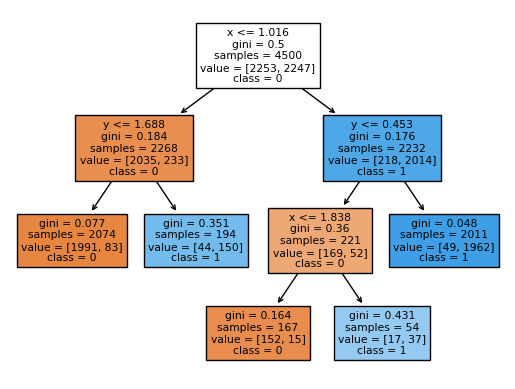

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure()
_ = plot_tree(clf, 
                   feature_names=clf.feature_names_in_,
                   class_names=["0", "1"], # named the classes
                   filled=True)

* Do the same thing for 300 leaf nodes.

You should worry that a decision tree with 300 leaf nodes is likely to overfit the data, at least for our simple data. I would say this chart does not look terrible, but it probably suggests overfitting.

In [ ]:
clf = DecisionTreeClassifier(max_leaf_nodes=300)
clf.fit(X_train, y_train)
make_chart(clf, df_art)

alt.Chart(...)

* Why does the probability chart with 300 leaf nodes suggest overfitting?

The chart with the probabilities, on the other hand, screams overfitting, even though the shape is exactly the same.  Why?  Check out the listed probabilities.  Everything is probability 0 or probability 1.  This is because our model, when dividing the data, has enough flexibility to shrink each region down until it only contains points of Class 0 or points of Class 1, and so the probabilities in turn are always 0 or 1.  It's not reasonable to assume that one of the random middle blue points here has a probability 0 of being Class 1, while every surrounding point has a probability 1 of being Class 1.

In [ ]:
make_chart(clf, df_art, prob = True)

alt.Chart(...)

In [ ]:
clf.score(X_test, y_test)

0.956

In [ ]:
clf.score(X_train, y_train)

1.0

While a high accuracy score on the test data is a good sign, it's not the only metric to consider. It's possible for a decision tree that appears to have an overly complex decision boundary to still perform well on the test data. This can happen if the test data is relatively similar to the training data where the overfitted model still generalizes reasonably well to it.

To address potential overfitting with decision trees, you can consider:
* Limiting the maximum number of leaf nodes (max_leaf_nodes) or maximum depth (max_depth) during tree construction.
* Using ensemble methods like Random Forests or Gradient Boosted Trees, which can improve generalization by combining multiple decision trees.


## Random forest classifier

"Small" decision trees (with a very limited depth or a very limited number of leaf nodes) can be too rigid.  "Big" decision trees can be prone to overfitting.  A *Random Forest* is a type of Machine Learning model built from many decision trees, the "forest" of multiple trees, and it can help protect against both of these deficiencies.

Basically a random forest fits many decision trees to the data, and then an average of the predictions from those trees.  Of course, we don't want to use the same tree many times, so randomness is included in this process in two different ways.

   - In each run, we only pick up a random subset of **features** as training dataset
   - In each run, we only pick up a random subset of **samples** as training dataset

* Fit a random forest classifier to the data using 200 decision trees, each with a maximum of 5 leaf nodes.

We are back to our usual routine.  This classifier is defined in the `ensemble` library, presumably because a random forest involves a collection of decision trees.  (The name "forest" makes it easy to remember.)

Here we use the same number of leaf nodes as earlier, and we also specify `n_estimators=200`, which means our random forest will contain 200 decision trees.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200, max_leaf_nodes=5)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=5, n_estimators=200)

Notice how much better this looks (how much more flexible, while still being fairly regular), than the corresponding chart for a decision tree with 5 leaf nodes.  It turns out that random forests can both fight against underfitting (as in this example) and also fight against overfitting (as in the next example with 300 leaf nodes).

In [ ]:
make_chart(rfc, df_art)

alt.Chart(...)

Here are the corresponding probabilities.  Because we are taking averages from many decision trees, even though each individual decision tree only has 5 possible predicted probabilities, the probabilities for different trees will be different in general, and so when we take averages, we have many more than 5 outputs.  (Just run your mouse over the following chart, and notice how many more than 5 probabilities are output.)

In [ ]:
make_chart(rfc, df_art, prob = True)

alt.Chart(...)

* Do the same thing for 300 leaf nodes.

This chart I would say looks a little better than the corresponding decision tree chart, but it still suggests some overfitting.

In [ ]:
rfc = RandomForestClassifier(n_estimators=200, max_leaf_nodes=300)
rfc.fit(X_train, y_train)
make_chart(rfc, df_art)

alt.Chart(...)

But at least the corresponding probability chart looks much better than the corresponding decision tree chart.  Recall that in our decision tree chart with 300 leaf nodes, every predicted probability was either 0 or 1.  Here the random forest has much more nuance in its predictions.

In [ ]:
make_chart(rfc, df_art, prob = True)

alt.Chart(...)

* How can we find the individual trees within the random forest?

Recall that our random forest was built out of 200 decision trees (because of our `n_estimators=200` input to the constructor).  We can actually access a list of those decision trees through the `estimators_` attribute.

In [ ]:
len(rfc.estimators_)

200

In [ ]:
type(rfc.estimators_)

list

In [ ]:
type(rfc.estimators_[40])

sklearn.tree._classes.DecisionTreeClassifier

There is a technicality that the decision trees in the list do not store the feature names (the column names "x" and "y" in our case) which is why the following warning comes up, but just notice how we are getting a chart corresponding to one of the 200 decision trees in our random forest.

In [ ]:
make_chart(rfc.estimators_[40], df_art)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


alt.Chart(...)

Look back and forth at these two decision tree charts, and convince yourself that they are fairly different.  Our overall random forest predictions are formed by taking an average of these predictions.

In [1]:
make_chart(rfc.estimators_[41], df_art)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


alt.Chart(...)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e7c658b2-50ef-48d5-b261-a5ba68711e97' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>